In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('EV_cars.csv').dropna(subset=['Efficiency', 'Price.DE.'])
selected_features = df[['Efficiency', 'Price.DE.']]
features_standardized = StandardScaler().fit_transform(selected_features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

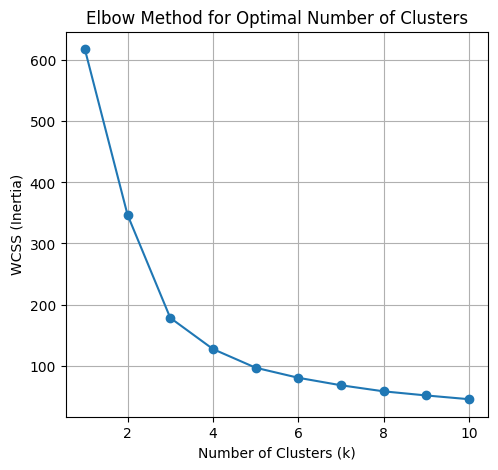

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), [KMeans(n_clusters=k, random_state=42).fit(features_standardized).inertia_ for k in range(1, 11)], marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


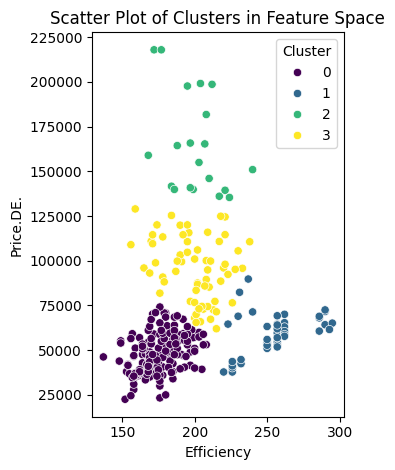

In [16]:
optimal_k = 4
df['cluster'] = KMeans(n_clusters=optimal_k, random_state=42).fit_predict(features_standardized)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Efficiency', y='Price.DE.', data=df, hue='cluster', palette='viridis')
plt.title('Scatter Plot of Clusters in Feature Space')
plt.xlabel('Efficiency')
plt.ylabel('Price.DE.')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

clustered_df = df[['Car_name', 'Efficiency', 'Price.DE.', 'cluster']]

In [17]:
for cluster_id in range(optimal_k):
    cluster_subset = clustered_df[clustered_df['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:\n")
    print("Top 5 rows:")
    print(cluster_subset.head())
    print("\nBottom 5 rows:")
    print(cluster_subset.tail())



Cluster 0:

Top 5 rows:
                              Car_name  Efficiency  Price.DE.  cluster
0  Tesla Model Y Long Range Dual Motor         172    59017.0        0
1                        Tesla Model 3         137    46220.0        0
2                           BYD ATTO 3         183    44625.0        0
3               MG MG4 Electric 64 kWh         171    39990.0        0
4  Tesla Model 3 Long Range Dual Motor         149    55220.0        0

Bottom 5 rows:
                             Car_name  Efficiency  Price.DE.  cluster
298                         Aiways U6         171    47588.0        0
310                Genesis GV60 Sport         195    63200.0        0
312  VinFast VF 8 Plus Extended Range         206    58890.0        0
317           Abarth 500e Convertible         168    40990.0        0
331           Fiat 500e Cabrio 24 kWh         158    35490.0        0

Cluster 1:

Top 5 rows:
                         Car_name  Efficiency  Price.DE.  cluster
51                    